# Real Estate Clean up

This is a real dataset and it was downloaded using web scraping techniques. The data contains registers from fotocasa which is one of the most popular websites of real estate in Spain. Please, do not do this (web scraping) unless it is for academic purposes.

The dataset was downloaded a few years ago by Henry Navarro and In no case were economic returns obtained from it.

It contains thousands of data from real houses published on the web www.fotocasa.com. Your goal is to extract as much information as possible with the knowledge you have so far about data science, for example what is the most expensive house in the entire dataset?

Let's start with precisely that question... Good luck!

#### Exercise 00. Read the dataset assets/real_estate.csv and try to visualize the table (★☆☆)

In [2]:
import pandas as pd

# this CSV file contains semicolons instead of comas as separator
ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,15331,153901377,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,96.0,259470,...,0,0,0,0,0,0,"40,45416","-3,70286",NaN,NaN
15331,15332,150394373,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,150.0,165000,...,0,0,0,0,0,0,"40,36652","-3,48951",NaN,NaN
15332,15333,153901397,False,tecnocasa torrelodones,912780348.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,175.0,495000,...,0,0,0,0,0,0,"40,57444","-3,92124",NaN,NaN
15333,15334,152607440,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,101.0,195000,...,0,0,0,0,0,0,"40,36967","-3,48105",NaN,NaN


#### Exercise 01. Which is the most expensive house in the dataset? (★☆☆)

Print the address and the price of the selected house. For example:

`The house with address General Street Nº5 is the most expensive and its price is 5000000 USD`

In [3]:
import pandas as pd
precio_max = ds['price'].max()
direccion_max = ds.loc[ds['price'] == precio_max , 'address'].values[0]

# Para verificar si solo hay una casa en este precio:

count_max = (ds['price'] == precio_max).sum()
print("Number of houses with the maximum price: " , count_max)

print ("The house with address" , direccion_max , "is the most expensive and its price is" , precio_max , "EUR")

Number of houses with the maximum price:  1
The house with address El Escorial is the most expensive and its price is 8500000 EUR


#### Exercise 02. Which is cheapest house in the dataset? (★☆☆)

Print the address and the price of the selected house. For example:

`The house with address Concrete Street Nº1 is the cheapest and its price is 12000 USD`

In [4]:
import pandas as pd
precio_min = ds[ds['price'] > 0]['price'].min()
direccion_min = ds.loc[ds['price'] == precio_min , 'address'].values[0]
#print ("The house with address" , direccion_min , "is the cheapest and its price is" , precio_min , "EUR")

# It is almost impossible to have a house that could be sold by 600 EUR, so, we will ignore thi value and take the next house.

precio_min = ds[ds['price'] > 600]['price'].min()
direccion_min = ds.loc[ds['price'] == precio_min , 'address'].values[0]

# Para verificar si solo hay una casa en este precio:

count_min = (ds['price']==precio_min).sum()
print("Number of houses with the minimum price: " , count_min)

# ¿Cúal es la dirección de las dos casas más baratas?

direccion_casas = ds[['address','price']][ds['price'] == ds[ds['price']>600]['price'].min()].reset_index(drop=True)
#print(direccion_casas)

print ("The houses with address" , str(direccion_casas.loc[0,'address']) , "are the cheapest and their price is" , precio_min , "EUR")

Number of houses with the minimum price:  2
The houses with address Mayor, Los Santos de la Humosa are the cheapest and their price is 16200 EUR


#### Exercise 03. Which is the biggest and the smallest house in the dataset? (★☆☆)

Print both the address and the surface of the selected houses. For example:

`The bigger house is located on Yukka Street Nº10 and its surface is 5000 meters`

`The smaller house is located on County Road 1 N and its surface is 200 meters`

In [5]:
import pandas as pd

ds = pd.read_csv('assets/real_estate.csv', sep=';')

# M2 de la casa más grande (filtro puesto para viviendas con menos de 66666 m2 ya que este valor es muy poco usual):

m2_max = ds[ds['surface'] < 66666]['surface'].max()
#print(round(m2_max))

# M2 de la casa más pequeña:

m2_min=ds['surface'].min()

# Direccion de la casa más grande:

direccion_m2max = ds.loc[ds['surface'] == m2_max,"address"].values[0]

# Direccion de la casa más pequeña:

direccion_m2min = ds.loc[ds['surface'] == m2_min,"address"].values[0]
#print(direccion_m2min)

print("The biggest house is located on",direccion_m2max, "and its surface is",m2_max, "square meters.")
print("The smaller house is located on",direccion_m2min, "and its surface is",m2_min, "square meters.")


The biggest house is located on Calle Paraje Monte de Valdeoliva, San Agustín del Guadalix and its surface is 16853.0 square meters.
The smaller house is located on Calle Amparo,  Madrid Capital and its surface is 15.0 square meters.


#### Exercise 04. How many populations (level5 column) the dataset contains? (★☆☆)

Print the name of the populations with comma as separator. For example:

`> print(populations)`

`population1, population2, population3,...`

In [6]:
import pandas as pd

ds = pd.read_csv('assets/real_estate.csv', sep=';')

#poblacion=ds["level5"].drop_duplicates()
poblacion_alfabetica = ds["level5"].sort_values().drop_duplicates()

print("The data set contains", len(poblacion_alfabetica), "populations.")
print(", ".join((poblacion_alfabetica)))

# Para saber cuantas veces se repite una población:

print(ds['level5'].value_counts())

The data set contains 168 populations.
 Madrid Capital, Ajalvir, Alcalá de Henares, Alcobendas, Alcorcón, Aldea del Fresno, Algete, Alpedrete, Ambite, Anchuelo, Aranjuez, Arganda del Rey, Arroyomolinos (Madrid), Batres, Becerril de la Sierra, Belmonte de Tajo, Boadilla del Monte, Braojos, Brea de Tajo, Brunete, Buitrago del Lozoya, Bustarviejo, Cabanillas de la Sierra, Cadalso de los Vidrios, Camarma de Esteruelas, Campo Real, Canencia, Carabaña, Casarrubuelos, Cenicientos, Cercedilla, Chapinería, Chinchón, Ciempozuelos, Cobeña, Collado Mediano, Collado Villalba, Colmenar Viejo, Colmenar de Oreja, Colmenar del Arroyo, Colmenarejo, Corpa, Coslada, Cubas de la Sagra, Daganzo de Arriba, El Atazar, El Berrueco, El Boalo - Cerceda – Mataelpino, El Escorial, El Molar (Madrid), El Vellón, El Álamo, Estremera, Fresnedillas de la Oliva, Fresno de Torote, Fresno de Torote - Serracines, Fuenlabrada, Fuente El Saz de Jarama, Fuentidueña de Tajo, Galapagar, Garganta de los Montes, Gargantilla del L

#### Exercise 05. Does the dataset contain NAs? (★☆☆)

Print a boolean value (`true` or `fase`) followed by the rows/cols that contains NAs.

In [7]:
import pandas as pd

ds = pd.read_csv('assets/real_estate.csv', sep=';')

valores_nulos = ds.isnull().any()
print (valores_nulos)

Unnamed: 0          False
id_realEstates      False
isNew               False
realEstate_name      True
phone_realEstate     True
url_inmueble        False
rooms                True
bathrooms            True
surface              True
price               False
date                False
description          True
address             False
country             False
level1              False
level2              False
level3              False
level4               True
level5              False
level6               True
level7               True
level8               True
upperLevel          False
countryId           False
level1Id            False
level2Id            False
level3Id            False
level4Id            False
level5Id            False
level6Id            False
level7Id            False
level8Id            False
accuracy            False
latitude            False
longitude           False
zipCode              True
customZone           True
dtype: bool


#### Exercise 06. Delete the NAs of the dataset, if applicable (★★☆)

Print a comparison between the dimensions of the original DataFrame versus the DataFrame after the deletions

In [8]:
import pandas as pd

ds = pd.read_csv('assets/real_estate.csv', sep=';')

ds_original = ds.shape
ds_limpio = ds.dropna().shape

print("Dimensions original dataframe:",ds_original)
print("Dimensions cleaned dataframe :",ds_limpio)

# Encontrar las columnas con más valores nulos del dataset:

max_nulos = ds.isna().sum().sort_values(ascending = False)
print(max_nulos)

Dimensions original dataframe: (15335, 37)
Dimensions cleaned dataframe : (0, 37)
customZone          15335
zipCode             15335
level6              14627
level8               8579
level4               6643
level7               2277
surface              1250
phone_realEstate      794
rooms                 353
bathrooms             345
description           142
realEstate_name        10
level1Id                0
level8Id                0
level7Id                0
level6Id                0
level5Id                0
level4Id                0
accuracy                0
level3Id                0
latitude                0
longitude               0
level2Id                0
Unnamed: 0              0
countryId               0
upperLevel              0
id_realEstates          0
level3                  0
level2                  0
level1                  0
country                 0
address                 0
date                    0
price                   0
url_inmueble            0
isNew   

#### Exercise 07. Which is the mean of prices in the population (level5 column) of "Arroyomolinos (Madrid)"? (★★☆)

Print the obtained value

In [9]:
import pandas as pd

ds = pd.read_csv('assets/real_estate.csv', sep=';')

ds = ds.loc[ds['price'] != 0]

precios_Arroyomolinos = (ds.loc[ds["level5"] == "Arroyomolinos (Madrid)","price"]).sort_values(ascending = True)
#print(precios_Arroyomolinos)

media_precios_Arroyomolinos = precios_Arroyomolinos.mean()

print("The average prices in Arroyomolinos (Madrid) is",media_precios_Arroyomolinos.round(0),"EUR")
                            

The average prices in Arroyomolinos (Madrid) is 298905.0 EUR


#### Exercise 08. Plot the histogram of prices for the population (level5 column) of "Arroyomolinos (Madrid)" and explain what you observe (★★☆)

Print the histogram of the prices and write in the Markdown cell a brief analysis about the plot.

        price
453    165338
607    251646
613    396000
707    225000
852    373000
...       ...
15019  218000
15089  230000
15091  217000
15094  227000
15192  462000

[137 rows x 1 columns]


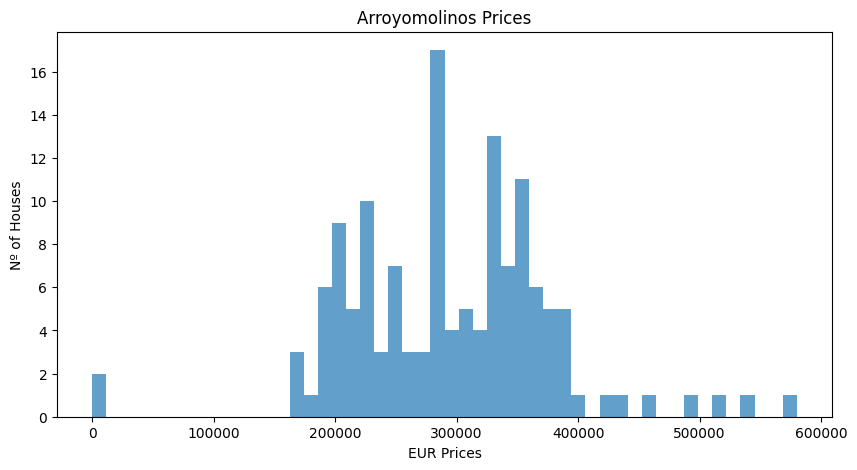

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

ds = pd.read_csv('assets/real_estate.csv', sep=';')

# Aquí estamos usando el data set limpio para que no salgan valores iguales que cero.

ds_filter = ds[ds['level5'] == "Arroyomolinos (Madrid)"]
ds_plot = ds_filter[["price"]]
print(ds_plot)

data=ds_plot

plt.figure(figsize=(10,5))
plt.hist(data,bins=50,alpha=0.7)
plt.title("Arroyomolinos Prices")
plt.ylabel("Nº of Houses")
plt.xlabel("EUR Prices")
plt.show()

In the graph we can see that the marjority of houses in Arroyomolinos can cost arround 200.000 EUR and 400.000 EUR. Just a few houses cost more than 400.000 EUR. 

#### Exercise 09. Are the averages of "Valdemorillo" and "Galapagar" prices the same? (★★☆)

Print the both average prices and then write a conclusion about them

In [11]:
import pandas as pd

ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds = ds.loc[ds['price'] != 0]

media_precios_Valdemorillo=ds.loc[ds["level5"] == "Valdemorillo","price"].mean().round(2)
print("Average prices in Valdemorillo: ", media_precios_Valdemorillo , "EUR")

media_precios_Galapagar=ds.loc[ds["level5"] == "Galapagar","price"].mean().round(2)
print("Average prices in Galapagar: ", media_precios_Galapagar , "EUR")

diferencia_media = abs(media_precios_Valdemorillo - media_precios_Galapagar)

# Comentario:
print("The average price of houses in Valdemorillo and Galapagar is almost the same, they differ in",diferencia_media.round(2),"USD.")

Average prices in Valdemorillo:  363860.29 EUR
Average prices in Galapagar:  360063.2 EUR
The average price of houses in Valdemorillo and Galapagar is almost the same, they differ in 3797.09 USD.


#### Exercise 10. Are the averages of "Valdemorillo" and "Galapagar" price per square meter (price/m2) the same? (★★☆)

Print the both average prices and then write a conclusion about

Hint: Create a new column called `pps` (price per square) and then analyse the values

In [12]:
import pandas as pd
ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds = ds.fillna(0)
ds = ds.loc[(ds['price'] != 0) & (ds['surface'] != 0)]

# Creando una columna con el valor de € / m2 calculado:

ds["pps"] = ds["price"]/ds["surface"]
#print(ds[["price" , "surface" , "pps"]])


pps_Valdemorillo=ds.loc[ds["level5"]=="Valdemorillo","pps"]
#print(pps_Valdemorillo)
media_pps_Valdemorillo=pps_Valdemorillo.mean().round(2)

pps_Galapagar=ds.loc[ds["level5"]=="Galapagar","pps"]
#print(pps_Galapagar)
media_pps_Galapagar=pps_Galapagar.mean().round(2)

print("Average €/m2 Valdemorillo: " , media_pps_Valdemorillo , "EUR")
print("Average €/m2 Galapagar: " ,media_pps_Galapagar , "EUR")
print("The average of the square meter price of Valdemorillo is higher when compared with Galapagar.")

Average €/m2 Valdemorillo:  1317.95 EUR
Average €/m2 Galapagar:  1606.32 EUR
The average of the square meter price of Valdemorillo is higher when compared with Galapagar.


#### Exercise 11. Analyse the relation between the surface and the price of the houses (★★☆)

Hint: You can make a `scatter plot` and then write a conclusion about it

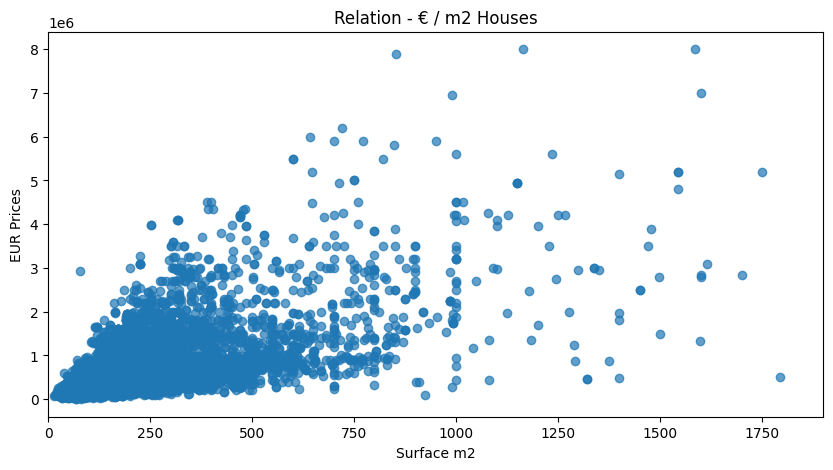

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds = ds.fillna(0)
ds = ds.loc[(ds['price'] != 0) & (ds['surface'] != 0)]

x=ds["surface"]
y=ds["price"]
plt.figure(figsize=(10,5))
plt.scatter(x,y,alpha=0.7)
plt.xlim(0,1900)
plt.title("Relation - € / m2 Houses")
plt.ylabel("EUR Prices")
plt.xlabel("Surface m2")
plt.show()

As a conclusion from the scatter plot, we can see that most of the houses are in the range 0 - 750 m2. Also, the prices are higher as the surface of the houses increase.

#### Exercise 12. How many real estate agencies the dataset contains? (★★☆)

Print the obtained value

In [14]:
import pandas as pd
ds = pd.read_csv('assets/real_estate.csv', sep=';')

real_estate=ds["realEstate_name"].drop_duplicates().dropna()

print("There are",len(real_estate),"real estate agencies in the dataset.")

There are 1821 real estate agencies in the dataset.


#### Exercise 13. Which is the population (level5 column) that contains the most houses? (★★☆)

Print both the population and the number of houses

In [15]:
import pandas as pd

ds = pd.read_csv('assets/real_estate.csv', sep=';')

poblacion_repite=ds.groupby("level5").size().idxmax()
numero_repite=ds.groupby("level5").size().max()

print(poblacion_repite,"has",numero_repite,"houses in the dataset.")

 Madrid Capital has 6643 houses in the dataset.


#### Exercise 14. Now let's work with the "south belt" of madrid. Make a subset of the original DataFrame that contains the following populations (level5 column): "Fuenlabrada","Leganés","Getafe","Alcorcón" (★★☆)

Hint: Filter the original DataFrame using the column `level5` and the function `isin`

In [16]:
import pandas as pd

ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds = ds.fillna(0)
ds = ds.loc[(ds['price'] != 0) & (ds['surface'] != 0) & (ds['rooms'] != 0) & (ds['bathrooms'] != 0) ]

madrid_sur=ds[ds["level5"].isin(["Fuenlabrada","Leganés","Getafe","Alcorcón"])]
madrid_sur

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",0.0,0.0
85,86,153152077,False,sinergical inmobiliaria,0.0,https://www.fotocasa.es/es/comprar/vivienda/le...,1.0,1.0,50.0,107000,...,0,0,0,0,0,1,"40,35059","-3,82693",0.0,0.0
94,95,153995577,False,viviendas365com,911226014.0,https://www.fotocasa.es/es/comprar/vivienda/le...,3.0,2.0,120.0,320000,...,0,0,0,0,0,0,"40,31933","-3,77574",0.0,0.0
109,110,153586414,False,area uno asesores inmobiliarios,912664081.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,3.0,142.0,425000,...,0,0,0,0,0,0,"40,3313411","-3,8313868",0.0,0.0
161,162,153440116,False,prolucisa,916350416.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,123.0,239500,...,0,0,0,0,0,0,"40,2744807718156","-3,79192471504211",0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15275,15276,153903887,False,aliseda servicios de gestion inmobiliaria,911368198.0,https://www.fotocasa.es/es/comprar/vivienda/al...,3.0,1.0,78.0,138000,...,0,0,0,0,0,1,"40,31381","-3,83733",0.0,0.0
15291,15292,151697757,False,unipiso,912788631.0,https://www.fotocasa.es/es/comprar/vivienda/al...,3.0,2.0,110.0,279000,...,0,0,0,0,0,0,"40,3259051","-3,76318",0.0,0.0
15305,15306,153902389,False,jadein ferrero,914871639.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,85.0,170000,...,0,0,0,0,0,0,"40,2882193","-3,8098617",0.0,0.0
15322,15323,153871864,False,gestion comercial,911220662.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,91.0,112000,...,0,0,0,0,0,0,"40,28282","-3,78892",0.0,0.0


#### Exercise 15. Make a bar plot of the median of the prices and explain what you observe (you must use the subset obtained in the question 14) (★★★)

Print the bar of the median of the prices and write in the Markdown cell a brief analysis about the plot

Index(['Alcorcón', 'Fuenlabrada', 'Getafe', 'Leganés'], dtype='object', name='level5')
[183000. 157000. 282048. 170000.]


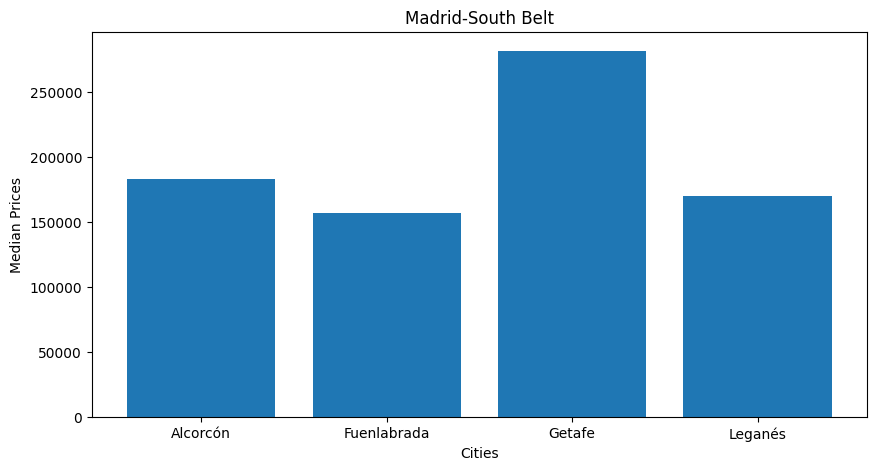

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds = ds.fillna(0)
ds = ds.loc[(ds['price'] != 0) & (ds['surface'] != 0) & (ds['rooms'] != 0) & (ds['bathrooms'] != 0) ]

madrid_sur=ds[ds["level5"].isin(["Fuenlabrada","Leganés","Getafe","Alcorcón"])]

mediana_precios=madrid_sur.groupby("level5")["price"].median()

print(mediana_precios.index)
print(mediana_precios.values)
plt.figure(figsize=(10,5))
plt.bar(mediana_precios.index,mediana_precios.values)
plt.title("Madrid-South Belt")
plt.xlabel("Cities")
plt.ylabel("Median Prices")
plt.show()

From the bar plot we can see that Getafe has the higher median price (aprox. 282.000 EUR) from the South Belt of Madrid. Also, in the oposite side is Fuenlabrada with the lower median price (157.000 EUR).

#### Exercise 16. Calculate the sample mean and variance of the variables: price, rooms, surface area and bathrooms (you must use the subset obtained in the question 14) (★★★)

Print both values for each variable

In [18]:
ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds = ds.fillna(0)
ds = ds.loc[(ds['price'] != 0) & (ds['surface'] != 0) & (ds['rooms'] != 0) & (ds['bathrooms'] != 0) ]

madrid_sur=ds[ds["level5"].isin(["Fuenlabrada","Leganés","Getafe","Alcorcón"])]

# Calculo de la media y de la varianza con la función agg()

calc_madrid_sur = madrid_sur[['price' , 'rooms' , 'surface' , 'bathrooms']].agg(['mean' , 'var'])
print(calc_madrid_sur)

             price     rooms      surface  bathrooms
mean  2.259932e+05  3.011719   111.454427   1.628906
var   1.470992e+10  0.707816  4306.571584   0.577886


#### Exercise 17. What is the most expensive house of each population? You must use the subset obtained in the question 14 (★★☆)

Print both the address and the price of the selected house of each population. You can print a DataFrame or a single line for each population

In [19]:
import pandas as pd

madrid_sur=ds[ds["level5"].isin(["Fuenlabrada","Leganés","Getafe","Alcorcón"])]
max_precio_sur = madrid_sur.groupby('level5')['price'].max()
max_precio_sur


level5
Alcorcón        950000
Fuenlabrada     490000
Getafe         1050000
Leganés         650000
Name: price, dtype: int64

#### Exercise 18. Normalize the variable of prices for each population and plot the 4 histograms in the same plot (you must use the subset obtained in the question 14) (★★★)

For the normalization method you can use the one you consider to, there is not a single correct answer to this question. Print the plot and write in the Markdown cell a brief analysis about the plot

Hint: You can help yourself reviewing the multihist demo of Matplotlib

/tmp/ipykernel_15386/361724137.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  madrid_sur.loc[:, 'norm_price'] = madrid_sur['price'].apply(norm_prices)


level5
Alcorcón       Axes(0.125,0.11;0.775x0.77)
Fuenlabrada    Axes(0.125,0.11;0.775x0.77)
Getafe         Axes(0.125,0.11;0.775x0.77)
Leganés        Axes(0.125,0.11;0.775x0.77)
Name: norm_price, dtype: object

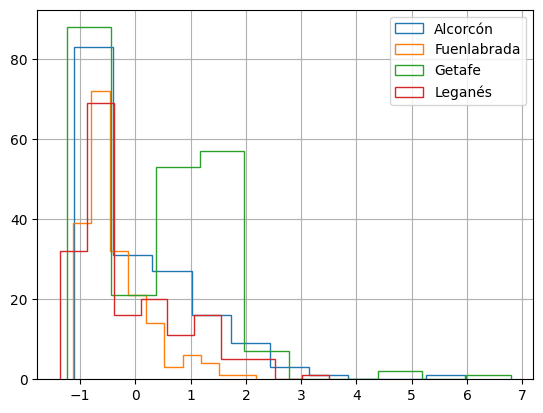

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

madrid_sur = ds[ds["level5"].isin(["Fuenlabrada","Leganés","Getafe","Alcorcón"])]

mean_price = madrid_sur['price'].mean()
std_price = madrid_sur['price'].std()

def norm_prices(x):
    return (x - mean_price) / std_price

madrid_sur.loc[:, 'norm_price'] = madrid_sur['price'].apply(norm_prices)

madrid_sur.groupby('level5')['norm_price'].hist(histtype='step', alpha = 1 , stacked=True, fill=False, legend=True)


The marjority of houses in the South Belt zone are priced in the range of 100.000 - 400.000 EUR. Getafe and Alcorcón present the higher deviations.

#### Exercise 19. What can you say about the price per square meter (price/m2) between the towns of "Getafe" and "Alcorcón"? You must use the subset obtained in the question 14 (★★☆)

Hint: Create a new column called `pps` (price per square) and then analyse the values

        price  surface    pps_south
0      195000    103.0  1893.203883
2      390000     99.0  3939.393939
3       89000     86.0  1034.883721
4      172000    106.0  1622.641509
5      315000     70.0  4500.000000
...       ...      ...          ...
15330  259470     96.0  2702.812500
15331  165000    150.0  1100.000000
15332  495000    175.0  2828.571429
15333  195000    101.0  1930.693069
15334  765000    152.0  5032.894737

[13583 rows x 3 columns]


level5
Alcorcón    Axes(0.125,0.11;0.775x0.77)
Getafe      Axes(0.125,0.11;0.775x0.77)
Name: pps_south, dtype: object

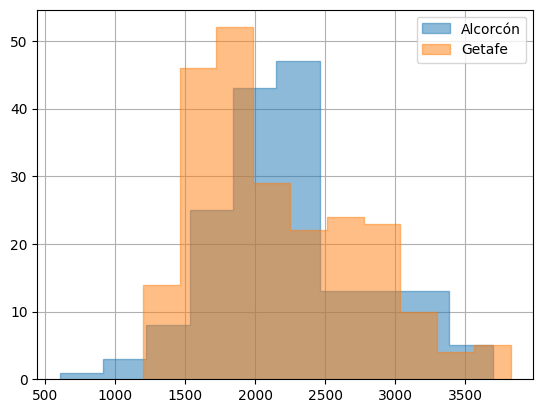

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

madrid_sur_subset = madrid_sur[madrid_sur["level5"].isin(["Getafe","Alcorcón"])]

# Creando una columna con el valor de € / m2 calculado:

madrid_sur["pps_south"] = madrid_sur["price"]/madrid_sur["surface"]
print(madrid_sur[["price" , "surface" , "pps_south"]])

madrid_sur_subset.groupby('level5')['pps_south'].hist(histtype='step', alpha = 0.5 , stacked=True, fill=True, legend=True)





Most of the houses located in Alcorcón have the €/m2 concentrated in the range of 1800 - 2400  € aprox. Getafe, on the other hand, has more house in the range of 1500 - 2000 €/m2 aprox.

#### Exercise 20. Make the same plot for 4 different populations (level5 column) and rearrange them on the same graph? You must use the subset obtained in the question 14 (★★☆) 
Hint: make a scatter plot of each population using subplots.

In [22]:
# TODO

#### Exercise 21. Make a plot of the coordinates (latitude and longitude columns) of the south belt of Madrid by color of each population (you must use the subset obtained in the question 14) (★★★★)

Execute the following cell and then start coding in the next one. You must implement a simple code that transform the coordinates columns in a Python dictionary (add more information if needed) and then add it to the map

In [ ]:
# TODO

In [ ]:
## HERE: plot the coordinates of the estates

## PUT HERE YOUR CODE:
